In this assignment, students will be using the K-nearest neighbors

algorithm to predict how many points NBA players scored in the 2013-2014
season.

A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0


Here are some selected columns from the data:

player - name of the player

pos - the position of the player

g - number of games the player was in

gs - number of games the player started

pts - total points the player scored

There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:

import pandas

with open("nba_2013.csv", 'r') as csvfile:

nba = pandas.read_csv(csvfile)

In [198]:
# Importing to required libraires
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [199]:
data = pd.read_csv("nba_2013.csv") # Reading the Data
data.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [200]:
data.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [201]:
data.dtypes

player           object
pos              object
age               int64
bref_team_id     object
g                 int64
gs                int64
mp                int64
fg                int64
fga               int64
fg.             float64
x3p               int64
x3pa              int64
x3p.            float64
x2p               int64
x2pa              int64
x2p.            float64
efg.            float64
ft                int64
fta               int64
ft.             float64
orb               int64
drb               int64
trb               int64
ast               int64
stl               int64
blk               int64
tov               int64
pf                int64
pts               int64
season           object
season_end        int64
dtype: object

In [202]:
# Checking for Null Values
data.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [203]:
data.shape

(481, 31)

In [204]:
for column in data:
    print(column)

player
pos
age
bref_team_id
g
gs
mp
fg
fga
fg.
x3p
x3pa
x3p.
x2p
x2pa
x2p.
efg.
ft
fta
ft.
orb
drb
trb
ast
stl
blk
tov
pf
pts
season
season_end


In [205]:


data['fg.'].fillna((data['fg.'].mean()), inplace=True)
data['x3p.'].fillna((data['x3p.'].mean()), inplace=True)
data['ft.'].fillna((data['ft.'].mean()), inplace=True)



In [206]:
data['x2p.'].fillna((data['x2p.'].mean()), inplace=True)
data['efg.'].fillna((data['efg.'].mean()), inplace=True)

In [207]:
data.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [208]:
X = data.drop(['player', 'pos','pts','bref_team_id','season'], axis=1)

In [209]:

y = data['pts']

In [210]:
# Scaling the required data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)
scaled_data

array([[-0.83677633,  0.3852869 , -0.86310432, ..., -0.66834514,
         0.22675114,  0.        ],
       [-1.55210112,  1.09685132, -0.1880585 , ..., -0.0137745 ,
         1.36535809,  0.        ],
       [ 0.11699006, -0.01002666, -0.45807683, ..., -0.5246589 ,
         0.02995488,  0.        ],
       ...,
       [-0.35989314,  1.01778861,  1.76957436, ...,  1.48694846,
         1.50592685,  0.        ],
       [-1.31365952,  1.13638268, -0.76184744, ...,  0.24166771,
         0.90148119,  0.        ],
       [-0.59833473,  0.6620064 , -0.5593337 , ..., -0.18939101,
         0.43760428,  0.        ]])

In [211]:
df=pd.DataFrame(data=scaled_data, columns= X.columns)

In [212]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season_end
count,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,...,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,4.810000e+02,481.0
mean,2.612833e-16,1.394126e-16,4.800964e-17,-4.852898e-17,7.518818e-17,-4.085436e-17,-1.588011e-16,-5.216433e-17,-1.938851e-17,1.320265e-16,...,-3.157846e-16,-7.039876e-17,8.494014e-17,1.171389e-16,4.200844e-17,-2.400482e-17,2.839032e-17,8.032383e-17,-1.915769e-17,0.0
std,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,...,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,1.001041e+00,0.0
min,-1.790543e+00,-2.065657e+00,-8.631043e-01,-1.379395e+00,-1.123664e+00,-1.151971e+00,-4.436945e+00,-7.797473e-01,-8.304648e-01,-1.951934e+00,...,-4.612239e+00,-8.996432e-01,-1.121353e+00,-1.092330e+00,-8.598224e-01,-1.130463e+00,-7.814979e-01,-1.147299e+00,-1.488188e+00,0.0
25%,-8.367763e-01,-8.401852e-01,-8.631043e-01,-9.476318e-01,-8.498574e-01,-8.534372e-01,-3.602565e-01,-7.797473e-01,-8.078427e-01,-1.539367e-01,...,-4.176615e-01,-7.062091e-01,-8.252036e-01,-8.175338e-01,-7.070145e-01,-8.714509e-01,-6.518100e-01,-8.120314e-01,-8.696852e-01,0.0
50%,-1.214515e-01,3.062242e-01,-5.255814e-01,-1.075354e-01,-2.731161e-01,-2.509412e-01,5.730486e-03,-4.648037e-01,-4.685111e-01,2.019330e-01,...,1.760915e-01,-3.354602e-01,-1.915815e-01,-2.529519e-01,-3.631967e-01,-2.095311e-01,-3.275901e-01,-2.213213e-01,-2.627262e-02,0.0
75%,5.938732e-01,8.991945e-01,9.595194e-01,8.686723e-01,6.648167e-01,6.718003e-01,4.327153e-01,5.587630e-01,6.248905e-01,5.569292e-01,...,5.974645e-01,2.770814e-01,4.627022e-01,4.565226e-01,3.015176e-01,5.962842e-01,2.560056e-01,5.769356e-01,7.327987e-01,0.0
max,2.978289e+00,1.175914e+00,1.904584e+00,2.102599e+00,3.822330e+00,3.429169e+00,5.729361e+00,4.357770e+00,3.807066e+00,4.894285e+00,...,1.772202e+00,6.192944e+00,4.271322e+00,4.473547e+00,4.648902e+00,4.366349e+00,6.318917e+00,3.562416e+00,2.349339e+00,0.0


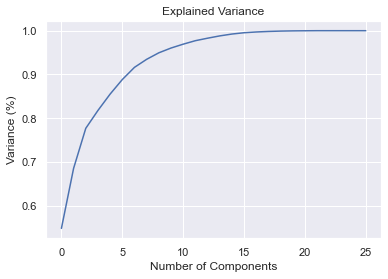

In [213]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 8 principal components explain almost 90% of the variance in data 
So, instead of giving all the columns as input, we’d only feed these 8 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [214]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(df)
# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4',
                          'principal component 5', 'principal component 6','principal component 7','principal component 8'
                         ])

In [215]:
principal_Df.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-1.707731,1.349221,0.137698,-0.548748,-0.955775,0.103595,-0.365214,0.441886
1,0.273633,2.410122,-0.228039,-0.936526,-1.857204,0.597322,-0.304870,0.866645
2,-0.555592,2.027820,0.297856,0.100243,-0.109473,0.025601,0.448118,0.104363
3,4.394457,-2.323870,0.685729,-0.083979,0.887427,-0.113303,0.804242,-1.081320
4,-0.154291,2.590255,0.319270,-0.263483,-0.000289,-0.923121,-1.659641,0.089752


In [216]:
x_train,x_test,y_train,y_test = train_test_split(principal_Df,y, test_size= 0.25)

In [217]:
print(x_train)

     principal component 1  principal component 2  principal component 3  \
353               3.369976               3.528970              -1.011674   
51                2.527578               1.105168              -0.552512   
236              -0.560092               0.742719               0.625279   
73                0.114951              -1.655308               0.560055   
338               1.506977               0.804822               0.129681   
..                     ...                    ...                    ...   
17                9.609122              -1.695094              -0.767933   
64                0.863953              -2.133549               0.634837   
26               -0.725014               2.217106               1.504586   
424              -5.323140              -1.329000              -3.176158   
479               0.867263               1.678909              -1.873720   

     principal component 4  principal component 5  principal component 6  \
353        

In [218]:
print(x_test)

     principal component 1  principal component 2  principal component 3  \
87                3.107398              -1.715083               0.988911   
194              -2.234113               1.391585               0.703808   
271              -3.158396               4.478798               8.311508   
226              -5.336588              -0.444718              -3.101539   
130               0.242927              -0.746094               1.256406   
..                     ...                    ...                    ...   
306               1.199346              -1.958098               2.046588   
284              -1.747186              -0.754529               1.170220   
341              -1.405878              -0.459096               0.200327   
206              -3.733657               0.340061               1.311622   
302              -1.370038              -0.591011               0.991581   

     principal component 4  principal component 5  principal component 6  \
87         

In [219]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=2)

neigh.fit(x_train, y_train)  #fit the model
#y_pred = model.predict(x_test) #make prediction on test set

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [220]:
y_pred = neigh.predict(x_test) #make prediction on test set

In [221]:
neigh.score(x_train,y_train)

0.9865743875385918

In [222]:
# Compute the mean squared error of our predictions.
from sklearn.metrics import mean_squared_error 
from math import sqrt
error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse

In [223]:
error

87.14559869494745

In [224]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 108.04234706970493
RMSE value for k=  2 is: 87.14559869494745
RMSE value for k=  3 is: 79.07652255083542
RMSE value for k=  4 is: 74.40855292191809
RMSE value for k=  5 is: 72.86579308326294
RMSE value for k=  6 is: 75.56500221153077
RMSE value for k=  7 is: 72.36399996179432
RMSE value for k=  8 is: 71.8574628263688
RMSE value for k=  9 is: 72.25778244426604
RMSE value for k=  10 is: 73.37207397688456
RMSE value for k=  11 is: 73.66047364800167
RMSE value for k=  12 is: 76.5250676142796
RMSE value for k=  13 is: 76.524934353313
RMSE value for k=  14 is: 75.53722474702596
RMSE value for k=  15 is: 77.6001228308363
RMSE value for k=  16 is: 77.21078065115215
RMSE value for k=  17 is: 77.83000886890729
RMSE value for k=  18 is: 77.44513594620616
RMSE value for k=  19 is: 78.67804808855183
RMSE value for k=  20 is: 79.18647609199293


Let's try to increase the accuracy by using hyperparameter tuning.

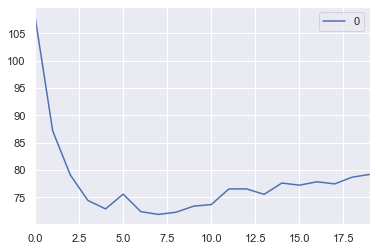

In [225]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

For a very low value of k (suppose k=1), the model overfits on the training data, which leads to a high error rate on the validation set. On the other hand, for a high value of k, the model performs poorly on both train and validation set. If you observe closely, the validation error curve reaches a minima at a value of k = 3. This value of k is the optimum value of the model (it will vary for different datasets). This curve is known as an ‘elbow curve‘ (because it has a shape like an elbow) and is usually used to determine the k value.

<b> Using Grid Search CV</b>

In [226]:
from sklearn.model_selection import GridSearchCV
params = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}

In [227]:
neigh = KNeighborsRegressor(algorithm='ball_tree', leaf_size=18, n_neighbors=3)

neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test) #make prediction on test set

neigh.score(x_train,y_train)

0.9819176343822359

In [228]:
error = sqrt(mean_squared_error(y_test,y_pred))

In [229]:
error

79.07652255083542

Hence, By using Grid Search parameter we can see that the value of Error has been decreased considerably at 
{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 5}